In [195]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [196]:
#Carga de archivos
inmu = pd.read_csv("Clusters.csv")
inmu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           657 non-null    int64  
 1   Alcaldia             657 non-null    object 
 2   Colonia              657 non-null    object 
 3   X1                   657 non-null    float64
 4   X2                   657 non-null    float64
 5   X3                   657 non-null    float64
 6   X4                   657 non-null    float64
 7   X5                   657 non-null    float64
 8   X6                   657 non-null    float64
 9   X7                   657 non-null    float64
 10  X8                   657 non-null    float64
 11  X9                   657 non-null    float64
 12  X10                  657 non-null    float64
 13  Cocina_equip         657 non-null    int64  
 14  Gimnasio             657 non-null    int64  
 15  Amueblado            657 non-null    int

In [197]:
inmu.dropna(inplace=True)

In [232]:
#Tomamos todas las columnas NUMÉRICAS a excepción de la 23 (nuestro target variable) para
#determinar el comportamiento de las variables con respecto a nuestra variable
X = inmu.select_dtypes(include=['float64', 'int64']).drop(columns=['Precio_m2','Cluster Labels','Unnamed: 0'])
#x = inmu.iloc[:,1:]   # todas las columnas posteriores a la primera
y = inmu.iloc[:,23]    # la primera columna

#Entrenamos nuestro modelo con las variables seleccionadas
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3)

#regr_1 = DecisionTreeRegressor(max_depth=2)
#regr_2 = DecisionTreeRegressor(max_depth=5)
#regr_1.fit(X, y)
#regr_2.fit(X, y)

In [233]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Cocina_equip,Gimnasio,Amueblado,Alberca,Terraza,Elevador,m2_construido,Baños,Recamaras,Lugares_estac
0,1.857685,5.622805,47.821312,21.693800,32.202925,4.541026,0.705162,0.167438,9.555907,50.081349,1,1,0,0,1,1,150.0,2.0,3,2
1,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,9.610347,52.749945,1,0,0,0,0,0,51.0,1.0,2,1
2,1.550909,5.758377,44.360119,18.897734,24.415938,4.172703,0.428650,0.061151,6.675828,39.647755,1,1,0,0,1,1,305.0,3.0,3,3
3,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,9.610347,52.749945,0,0,0,0,0,0,42.0,1.0,2,1
4,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,9.610347,52.749945,0,0,0,0,0,0,50.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0.351538,6.230002,31.695907,6.071809,20.071382,0.476854,0.025017,0.019992,3.169090,15.149627,1,1,0,0,1,1,99.0,2.0,2,1
653,0.771834,4.983509,32.914771,10.974065,24.551109,1.695343,0.048384,0.030823,5.469807,25.714023,1,0,0,0,0,1,64.0,1.0,2,1
654,1.857685,5.622805,47.821312,21.693800,32.202925,4.541026,0.705162,0.167438,9.555907,50.081349,1,1,0,0,1,1,90.0,1.0,3,1
655,1.857685,5.622805,47.821312,21.693800,32.202925,4.541026,0.705162,0.167438,9.555907,50.081349,1,0,0,0,0,0,50.0,1.0,2,1


In [234]:
#Corremos nuestro modelo:

dtree = DecisionTreeRegressor(random_state=44)
dtree.fit(x_train, y_train)  #entrenamiento: covars y respuesta
pred = dtree.predict(x_test)  #predicción con covars no entrenadas.
print(pred)

[1.19000000e+04 3.32300000e+03 2.00000000e+03 2.90000000e+03
 5.52400000e+03 5.55000000e+03 1.19000000e+03 1.19000000e+03
 6.70000000e+03 1.45000000e+04 1.19000000e+04 3.49000000e+04
 9.90000000e+02 7.59000000e+02 2.09000000e+04 3.16970000e+02
 2.30000000e+04 2.85050000e+03 5.00000000e+03 6.80000000e+02
 6.98700000e+03 1.74750300e+03 3.78060000e+02 1.41750000e+04
 6.70000000e+03 2.15000000e+03 4.50000000e+03 1.05400000e+03
 3.76539333e+02 1.25000000e+04 7.74600000e+03 2.30000000e+03
 4.52219100e+03 1.22500000e+03 1.19000000e+03 9.65000000e+02
 1.41750000e+04 4.69000000e+03 2.80000000e+04 7.53276000e+02
 7.57500000e+02 4.07145000e+03 9.26666667e+02 2.02646600e+03
 2.30000000e+03 3.45000000e+03 3.45000000e+03 1.19000000e+03
 6.00000000e+03 1.19990000e+03 1.38000000e+03 1.38000000e+03
 9.13575000e+02 4.91401000e+02 4.69000000e+03 8.47347000e+02
 2.09000000e+04 1.70000000e+03 1.30000000e+04 2.76000000e+03
 1.30000000e+03 2.30000000e+03 2.80000000e+04 3.32300000e+03
 3.32300000e+03 9.570500

In [251]:
from sklearn.metrics import mean_squared_error
#Evaluamos nuestro modelo
print("Mean Squared Error:", mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R-squared:", r2_score(y_test, pred))

Mean Squared Error: 8382389.1703851465
RMSE: 2895.2355984246165
R-squared: 0.6097647672578114


Hay un margen de error increíblemente alto, dado que con tan solo 650 datos existe un error de 7,311,604. Sin embargo, nuestro valor de R-squared quedó relativamente bien (el 73% de nuestros datos puede ser explicado por nuestro modelo).
Debido a esto, continuaremos con realizar un análisis para determinar la importancia de cada una de las variables elegidas y así su relevancia hacia nuestro modelo, para intentar corregir este error.

In [236]:
feature_importance = dtree.feature_importances_
feature_names = X.columns

# Para una mejor visualización, crearemos un data frame nuevo con los nombres de las variables
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Lo ordenamos en orden descendiente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostramos los resultados
print(feature_importance_df)

          Feature  Importance
16  m2_construido    0.665730
17          Baños    0.157430
8              X9    0.096567
19  Lugares_estac    0.017497
1              X2    0.014034
18      Recamaras    0.008856
13        Alberca    0.008730
12      Amueblado    0.006290
7              X8    0.005868
9             X10    0.005480
11       Gimnasio    0.004333
15       Elevador    0.002631
14        Terraza    0.001855
4              X5    0.001249
3              X4    0.001165
2              X3    0.000824
6              X7    0.000713
5              X6    0.000394
0              X1    0.000199
10   Cocina_equip    0.000156


Podemos observar que las variables con mayor relevancia a nuestro análisis son los m2 construidos, así como la cantidad de baños que tiene el inmueble y la población sin derechohabiencia a servicios de salud (X5). Sin embargo, estas últimas dos no parecen tener la relevancia tan directa como la que tiene los metros cuadrados construidos con nuestra variable de precio. Las tomaremos de igual manera para la realización de este análisis.

In [238]:
#Tomamos las columnas con mayor importancia en relación a nuestra target variable
#variables_seleccionadas = ['m2_construido', 'X9', 'X5']
variables_seleccionadas = ['m2_construido','Baños','X9']
X2 = inmu[variables_seleccionadas]
y = inmu.iloc[:,23]    # nuestra variable dependiente

#Entrenamos nuestro modelo con las variables seleccionadas
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y, test_size=.3)

#regr_1 = DecisionTreeRegressor(max_depth=2)
#regr_2 = DecisionTreeRegressor(max_depth=5)
#regr_1.fit(X, y)
#regr_2.fit(X, y)

In [239]:
#Corroboramos que nuestras variables estén guardadas exitosamente
X2

,m2_construido,Baños,X9
0,150.0,2.0,9.555907
1,51.0,1.0,9.610347
2,305.0,3.0,6.675828
3,42.0,1.0,9.610347
4,50.0,1.0,9.610347
...,...,...,...
652,99.0,2.0,3.169090
653,64.0,1.0,5.469807
654,90.0,1.0,9.555907
655,50.0,1.0,9.555907


In [240]:
#Corremos nuestro modelo:
dtree2 = DecisionTreeRegressor(random_state=44)
dtree2.fit(x2_train, y2_train)  #entrenamiento: covars y respuesta
pred2 = dtree2.predict(x2_test)  #predicción con covars no entrenadas.
print(pred2)

[ 2990.           295.          6300.           258.972
   548.13788889  5950.           870.          6600.
   705.06         847.5          779.1985      1980.
 12900.          3465.         14500.         17500.
   950.         11000.          3980.          5450.
  1113.          1024.52         895.          1480.975
 47200.          1480.975       7500.           800.
  2783.354        870.          1595.          3100.
   451.777        847.5         3882.84        8220.25
  1725.         13900.          1915.          1290.
   890.          7990.           593.6         3381.
   623.74         748.66666667   890.           870.
  7500.         15000.          6950.          9000.
  3980.         17666.           465.42        1150.
  5550.          5300.           816.          7500.
 14990.         16900.          1250.          1350.
  1725.           613.2995       819.0238      6200.
  7500.         25000.           899.           268.972
  1083.26666667   890.          109

In [252]:
from sklearn.metrics import mean_squared_error
#Evaluamos nuestro modelo
print("Mean Squared Error:", mean_squared_error(y2_test, pred2))
print("RMSE:", np.sqrt(mean_squared_error(y2_test, pred2)))
print("R-squared:", r2_score(y2_test, pred2))

Mean Squared Error: 10262079.935325144
RMSE: 3203.4481321421677
R-squared: 0.4779324461326322


El R-Squared aumentó a la vez que el error disminuyó. El modelo mejoró, pero no podemos confirmar si es del todo confiable considerando que el error sigue siendo muy alto para la cantidad de datos que tenemos. Por ende, realizaremos una poda de árbol, pero primero veremos cómo este se comporta gráficamente.

In [253]:
#Podemos insertar datos en el modelo para predecir su comportamiento:
dtree2.predict([[450,2,7.8]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([8500.])

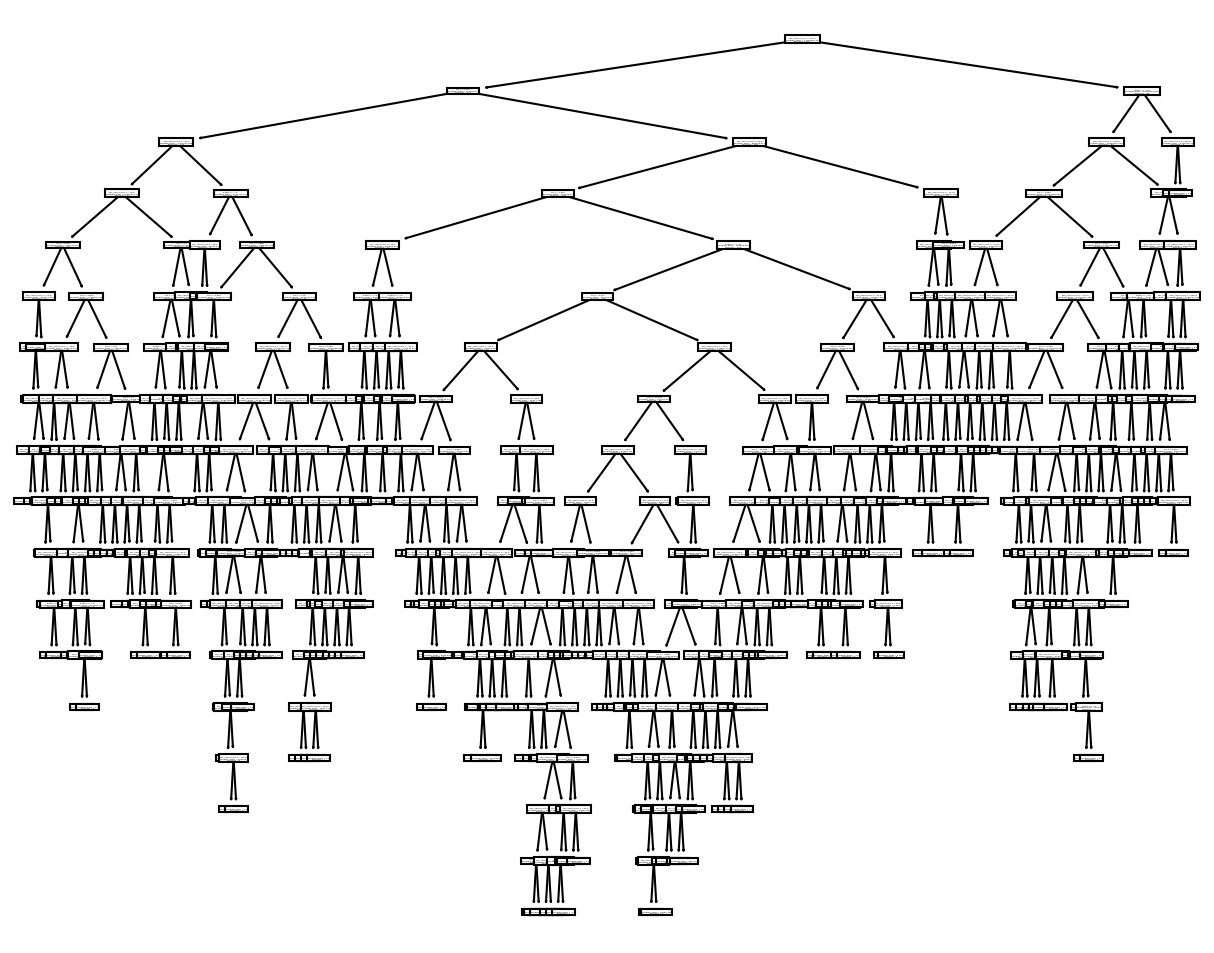

In [254]:
#Podemos imprimir el árbol de decisión:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(dtree2, feature_names=X2.columns);

Existen muchas variables a nuestro decision tree así como un sobreajuste, por lo que será necesaria una poda de árbol.

In [255]:
# Realizamos la poda ajustando los hiperparámetros
dtree_poda = DecisionTreeRegressor(max_depth=6, min_samples_split=9, min_samples_leaf=3, ccp_alpha=0.01,random_state=42)
dtree_poda.fit(x2_train, y2_train)

DecisionTreeRegressor(ccp_alpha=0.01, max_depth=6, min_samples_leaf=3,
                      min_samples_split=9, random_state=42)

In [256]:
# Realizamos predicciones en el conjunto de prueba después de la poda
y_pred_poda = dtree_poda.predict(x2_test)

In [258]:
# Calculamos el error cuadrático medio (MSE) después de la poda
mse_poda = mean_squared_error(y2_test, y_pred_poda)
print(f'MSE después de la poda: {mse_poda}')
print("RMSE:", np.sqrt(mse_poda))
print("R-squared:", r2_score(y2_test, pred2))

MSE después de la poda: 5059542.990455133
RMSE: 2249.3427907847067
R-squared: 0.4779324461326322


A través de distintas pruebas y ajustes en los hiperparámetros, estos son aquellos en donde el MSE y RMSE son de menor valor. A pesar de que disminuyó luego de la poda, sigue siendo un valor extremadamente alto, por lo que probaremos con distintas estrategias para su evaluación.

No obstante, ya podemos observar una diferencia significativa en nuestra gráfica.

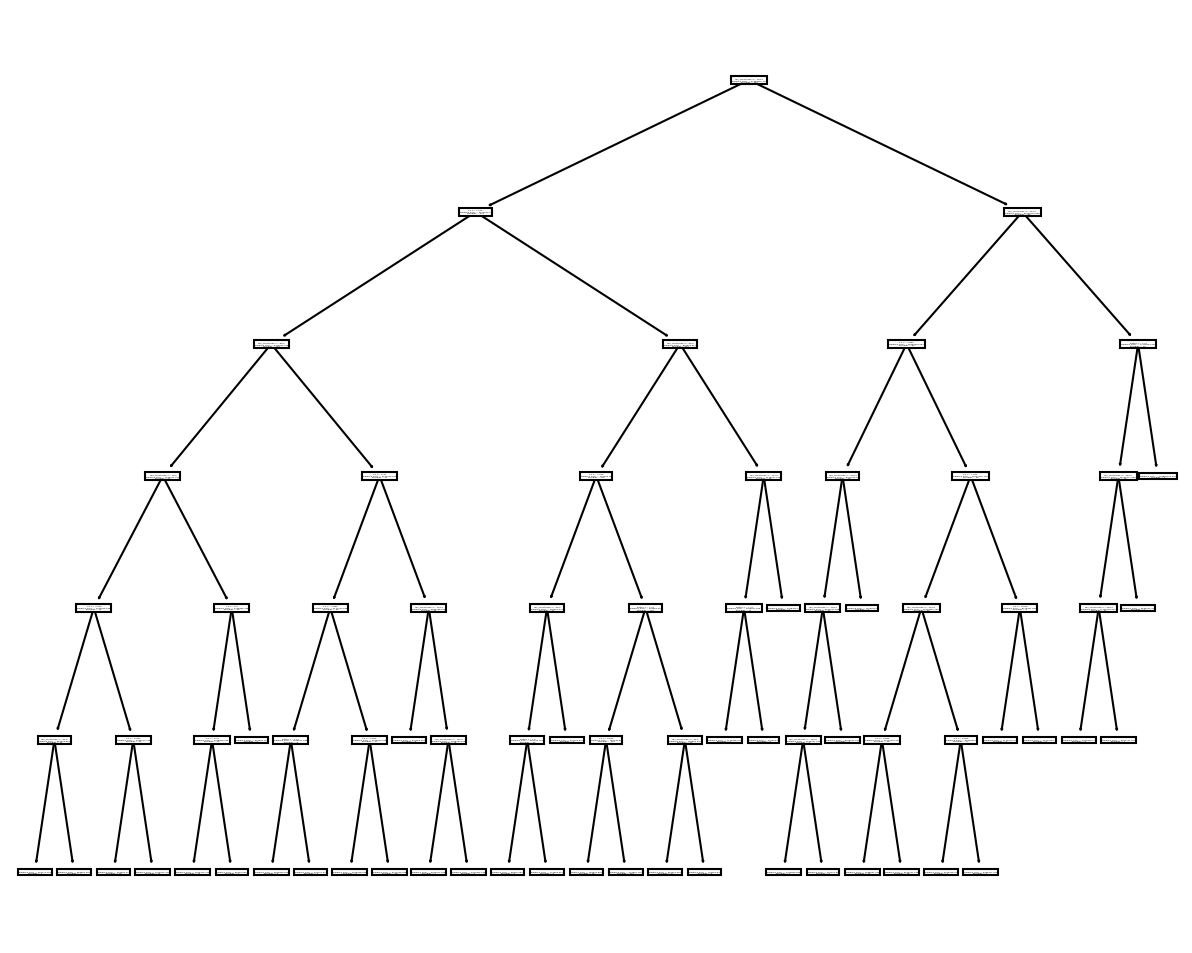

In [259]:
#Podemos imprimir el árbol de decisión:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(dtree_poda, feature_names=X2.columns);

In [260]:
#Validación Cruzada para evaluar el rendimiento de nuestro modelo
from sklearn.model_selection import cross_val_score

# Realizamos la validación cruzada con 5 divisiones (k=5)
cross_val_scores = cross_val_score(dtree2, X2, y, cv=5, scoring='r2')

# Imprimimos los puntajes R-squared en cada pliegue
print("R-squared en cada pliegue:", cross_val_scores)

# Imprimimos el R-squared promedio
print("R-squared promedio:", cross_val_scores.mean())

R-squared en cada pliegue: [0.82018596 0.75394096 0.15284877 0.75291088 0.79119665]
R-squared promedio: 0.6542166442177744


Podemos observar que, en promedio, nuestro rendimiento es en realidad del 65.42% (a diferencia del 47.79% como habíamos determinado antes). La validación cruzada implica dividir el conjunto de datos en pliegues (folds) y entrenar/evaluar el modelo en cada uno de ellos. La variabilidad en los pliegues puede resultar en diferentes valores de R-squared en cada iteración, lo cual es especialmente cierto si el conjunto de datos es relativamente pequeño, por lo que es normal si estos dos datos (el R-squared promedio y el general) son distintos.

Por otro lado, el error es demasiado alto, pero posterior a la poda realizada bajó. Debido a que ya se realizaron todos los ajustes correspondientes (ajuste de hiperparámetros, distintas estrategias de poda, validación cruzada), podemos concluir que nuestro R-squared final es de 0.67, lo cual signfica que nuestro modelo puede explicar el 67% de los datos con éxito.

Lo anterior, a pesar de ser un dato significativo, si tomamos en cuenta nuestro error cuadrático medio (RMSE = 2249.34), no recomendaríamos este modelo para la predicción de los datos, ya que no es del todo confiable. Es probable que esto se deba a que existen muy pocos datos en el dataframe, por lo que no hay suficiente información para realizar una predicción utilizando el modelo de árboles de decisión

